#                              L&T EduTech
#           St.Vincent Palloti College of Engineering
#                             AIML Notebook - W1

#### Central Tendency: Mean, Median, and Mode
       Central tendency is defined as “the statistical measure that identifies a single value as representative of an entire distribution.” It aims to provide an accurate description of the entire data. It is the single value that is most typical/representative of the collected data.
       
       The mean, median and mode are the three commonly used measures of central tendency [1]. Python uses three packages that supports the statisitcal computation. 
       
       They are,
            > Python's statistics buil-in library
            > NumPy (third party library)
            > SciPy (third party library)
            > Pandas 
    [1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3127352/

In [17]:
#importing the required packages
import math
import statistics as stat
import numpy as np
import scipy.stats as ss
import pandas as pd

In [18]:
#data to be used
x=[1,2,3,4,5,6] 
y=[7,6,5,4,3,2,1]
x_nan=[1,2,math.nan,4,5,6]  #nan denotes "Not a Number" - a common scenario in data analytics
y_nan=[7,6,5,math.nan,3,2,1]

print(type(x))
print(x)
print(y)
print(x_nan)
print(y_nan)
y=np.array(y)
y_nan=np.array(y_nan)
print(type(y))

<class 'list'>
[1, 2, 3, 4, 5, 6]
[7, 6, 5, 4, 3, 2, 1]
[1, 2, nan, 4, 5, 6]
[7, 6, 5, nan, 3, 2, 1]
<class 'numpy.ndarray'>


In [19]:
#finding the mean of the data - stat and numpy
print("stat mean of x:",stat.mean(x))
print("stat mean of x_nan:",stat.mean(x_nan))
print("np mean of list x:",np.mean(x))
print("np mean of list x_nan:",np.mean(x_nan))
print("np mean of np array y:",y.mean())
print("np mean of np array y_nan:",np.nanmean(y_nan))


stat mean of x: 3.5
stat mean of x_nan: nan
np mean of list x: 3.5
np mean of list x_nan: nan
np mean of np array y: 4.0
np mean of np array y_nan: 4.0


In [20]:
#finding the mean of the data - pandas
z=pd.Series(x)
z_nan=pd.Series(x_nan)
print(type(z))
print(z)
print(z.mean())
print(z_nan)
print(z_nan.mean())

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
3.5
0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    6.0
dtype: float64
3.6


##### Mean    
    The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.
    The variations of mean are, 
        > Weighted mean           
        > Geometric mean
        > Harmonic mean
    Some libraries have methods that suuport these variations. Let's quickly run through all these variations below,

> The <i>weighted mean</i>, also called the weighted arithmetic mean or weighted average, is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result.
            Define the weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.
            Usually, 𝑤ᵢ>=0 and Σᵢ𝑤ᵢ=1.

In [21]:
#weighted mean
x=[1,6,8,12,14,4]
w=[0.2,0.4,0.35,0.15,0.75,0.25]
y,w=np.array(x),np.array(w)
wm=np.average(y,weights=w) #using numpy average method - np array as input
print(wm)
z=pd.Series(x)
wm1=np.average(z,weights=w) #using numpy average method - pd series as input
print(wm1)

8.904761904761903
8.904761904761903


> The <i>harmonic mean</i> is the reciprocal of the mean of the reciprocals of all items in the dataset: 𝑛 / Σᵢ(1/𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in the dataset 𝑥.

In [22]:
#harmonic mean using stat library
hmean=stat.harmonic_mean(y)
print("hmean using stat lib:",hmean)

hmean using stat lib: 3.536842105263158


> Note that If you have a <i>nan</i> value in a dataset, then it will return nan. If there’s at least one 0, then it will return 0. If you provide at least one negative number, then you’ll get statistics.StatisticsError.

In [23]:
#harmonic mean using scipy.stats library
hmean1=ss.hmean(y)
print("hmean using scipy.stats is:",hmean1)

hmean using scipy.stats is: 3.536842105263158


> The <i>geometric mean</i> is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛. The following figure illustrates the arithmetic, harmonic, and geometric means of a dataset:

In [24]:
#geometric mean
from platform import python_version
print(python_version())
#gmean=stat.geometric_mean(y) #available from python 3.8... :-(
# print(gmean)
gmean=ss.gmean(y)
print(gmean)

3.7.4
5.642026024680419


#### Median
    > The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. 
    > If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). 
    > If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.

In [25]:
#meadian using stat
med=stat.median(x)
print(sorted(x))
print(med)
print("Median low:",stat.median_low(x))
print("Median high:",stat.median_high(x))
#print(x[:-1])
med1=stat.median(x[:-1])
print(med1)
print(y_nan)
print("median of nan list:",stat.median(y_nan))

[1, 4, 6, 8, 12, 14]
7.0
Median low: 6
Median high: 8
8
[ 7.  6.  5. nan  3.  2.  1.]
median of nan list: 5.0


In [26]:
#median using numpy
med2=np.median(w)
print(med2)
print(np.nanmedian(y_nan))
#median using pandas series
med3=z.median()
print(z)
print("median using pandas:",med3)
med4=z_nan.median()
print(z_nan)
print("nan median using pandas:",med4)

0.3
4.0
0     1
1     6
2     8
3    12
4    14
5     4
dtype: int64
median using pandas: 7.0
0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    6.0
dtype: float64
nan median using pandas: 4.0


#### Mode
       The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values

In [27]:
#mode using stat 
m=[1,2,3,3,4,5]
print(stat.mode(m))
#print(stat.multimode(m)) #avl in python>=3.8
m1=[1,2,1,2,3,3]
#print(stat.mode(m1)) #raises Stat.Error
#print(stat.multimode(m1)) #provides the output list of 1,2,3
m2=[1,2,math.nan,3,math.nan]
print(stat.mode(m2))

3
nan


In [28]:
#mode using scipy -- From my interpreteation, it works based on the first letter
#a=np.array(['b','b','b','b','n','n','n','n','a','a','a','a'])
#a=np.array(['ba','ba','ba','ba','n','n','n','n','ab','ab','ab','ab'])
a=np.array(['nale','nale','nale','male','male','male','female','female','female','gan','gan','gan'])
print(a)
mode1=ss.mode(a)
print(mode1)
print("mode value",mode1.mode)
print("count",mode1.count)

['nale' 'nale' 'nale' 'male' 'male' 'male' 'female' 'female' 'female'
 'gan' 'gan' 'gan']
ModeResult(mode=array(['female'], dtype='<U6'), count=array([3]))
mode value ['female']
count [3]


In [29]:
#mode using pandas
a=pd.Series(a)
print(a.mode())

0    female
1       gan
2      male
3      nale
dtype: object


## Measures of Variability 
- Measures of variability quantifies the spread of data points. Generally, the measures of variability are Variance, Standard deviation, Skewness, Percentiles, Ranges.
#### Variance
   - The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. 

In [30]:
#variacnce using stat 
var=stat.variance(x)
print(var)
var=stat.variance(x_nan)
print(var)
#variance using numpy
a=np.array([1,2,3,4,5])
var=np.var(a)
print("var w/o ddof -- (/n)",var)
var=np.var(a,ddof=1) #ddof - delta degrees of freedom
print("var with ddof -- (/n-1)",var)
#variance with nan values
a_nan=np.array([1,2,math.nan,3,4,5])
print(np.nanvar(a_nan,ddof=1))

#variance using pandas
a=pd.Series([1,2,3,4,5])
print("var using pands:",a.var())
a_nan=pd.Series(a_nan)
print("nan var using pandas",a_nan.var())

23.9
nan
var w/o ddof -- (/n) 2.0
var with ddof -- (/n-1) 2.5
2.5
var using pands: 2.5
nan var using pandas 2.5


#### Standard Deviation
   - The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.

In [31]:
std=stat.stdev(x)
print(x)
print(std)

[1, 6, 8, 12, 14, 4]
4.888762624632126


In [32]:
#std dev using numpy
std1=np.std(y)
print(y)
print(type(y))
print(std1)
print(y.std(ddof=1))
stdnan=np.nanstd(y_nan)
#print(y_nan)
print("std with nan:",stdnan)

[ 1  6  8 12 14  4]
<class 'numpy.ndarray'>
4.4628092796652945
4.888762624632126
std with nan: 2.160246899469287


## Probability Density Function
        The Probability Density Function (PDF) is a mathematical function that describes the relative probability of a random variable taking on certain values. 
        In other words, it provides a representation of the probability distribution of a continuous variable. 
        The PDF is non-negative and the area under the curve is 1, as it represents the total probability.
        The PDF is often denoted as (f(x)), where (x) represents the value of the random variable.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
 
mu, sigma = 0, 1  # Mean and standard deviation
x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)
print(pdf)
plt.plot(x, pdf, label='Normal Distribution')
plt.title('PDF of the Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()


[1.48671951e-06 1.56294518e-06 1.64291438e-06 1.72680223e-06
 1.81479157e-06 1.90707332e-06 2.00384677e-06 2.10531999e-06
 2.21171010e-06 2.32324372e-06 2.44015731e-06 2.56269761e-06
 2.69112199e-06 2.82569895e-06 2.96670852e-06 3.11444274e-06
 3.26920615e-06 3.43131624e-06 3.60110404e-06 3.77891458e-06
 3.96510749e-06 4.16005756e-06 4.36415530e-06 4.57780761e-06
 4.80143840e-06 5.03548920e-06 5.28041992e-06 5.53670947e-06
 5.80485658e-06 6.08538047e-06 6.37882168e-06 6.68574289e-06
 7.00672970e-06 7.34239154e-06 7.69336257e-06 8.06030255e-06
 8.44389784e-06 8.84486240e-06 9.26393876e-06 9.70189908e-06
 1.01595463e-05 1.06377152e-05 1.11372736e-05 1.16591234e-05
 1.22042022e-05 1.27734842e-05 1.33679815e-05 1.39887459e-05
 1.46368699e-05 1.53134881e-05 1.60197791e-05 1.67569666e-05
 1.75263212e-05 1.83291622e-05 1.91668589e-05 2.00408326e-05
 2.09525584e-05 2.19035668e-05 2.28954459e-05 2.39298433e-05
 2.50084680e-05 2.61330924e-05 2.73055547e-05 2.85277610e-05
 2.98016873e-05 3.112938

<Figure size 640x480 with 1 Axes>

Return Value:
[1.34627433e-02 7.24916949e-02 1.75652953e-01 2.52219625e-01
 2.37668493e-01 1.53570411e-01 6.89097997e-02 2.12030153e-02
 4.28137809e-03 5.12301651e-04 2.75854735e-05]


<BarContainer object of 11 artists>

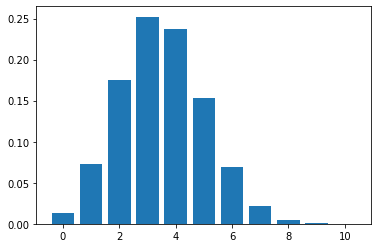

In [34]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# n: the total number of trials or times the experiment will be carried out.
# r: a list of integers from 0 to n, inclusive.
# p: the probability that the outcome of a single experiment will be a success. 
# The value of p must be between 0 and 1, inclusive.
n = 10
p = 0.35
#defining list of r values
r= list(range(n + 1))
#calling the binom.pmf function and printing its return value
return_val=binom.pmf(r, n, p) #return_val is the pmf of r
print('Return Value:')
print(return_val)
plt.bar(r,return_val)

## Linear Regression
        Regression is used to analyze / find the relationship between the variables. Eg. relationship between the salary and experience. 
        In simple linear regression, we predict scores on one variable based on results on another. The criteria variable Y is the variable we are predicting. Predictor variable X is the variable using which we are making our predictions.The prediction approach is known as simple regression.
        Equation : y = mx + c
        This is the simple linear regression equation where c is the constant and m is the slope and describes the relationship between x (independent variable) and y (dependent variable).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

# Get dataset
df_sal = pd.read_csv('Salary_Data.csv')
print(df_sal.head())

# Describe data
df_sal.describe()

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


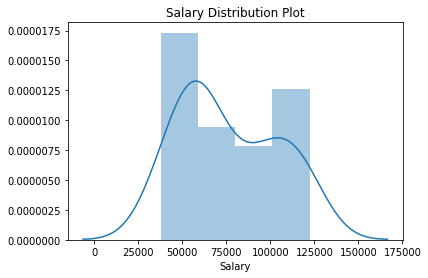

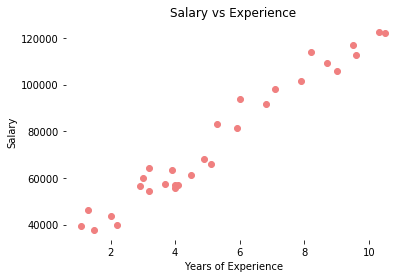

In [36]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [37]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent
# print(X)
# print(y)
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


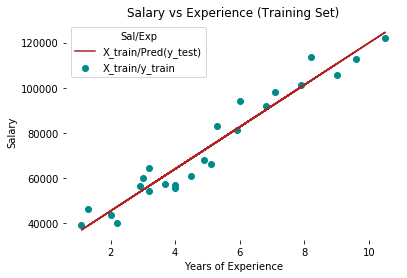

In [40]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'darkcyan')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

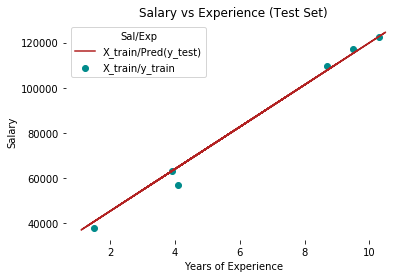

In [41]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'darkcyan')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Polynomial Regression
        Polynomial Regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial.
        In Polynomial Regression, the relationship between x and y is represented by a polynomial equation, which can capture more complex relationships, including curvature and other non-linear patterns.

In [42]:
# Import libraries - Repeated, but to go with the flow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [43]:
# Get dataset
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [44]:
# Describe data
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


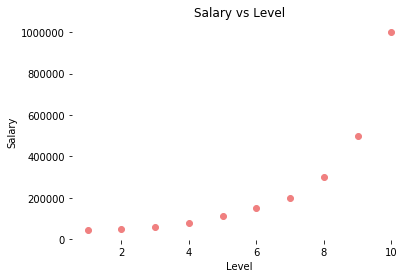

In [45]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [46]:
# Splitting variables
# Splitting variables
X = df_sal.iloc[:, 1:-1].values  # independent
y = df_sal.iloc[:, -1].values  # dependent
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [47]:
from sklearn.preprocessing import PolynomialFeatures
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 2)
#PolynomialFeatures takes the original feature matrix and transforms it into 
#a new matrix containing all possible polynomial combinations of the 
#features up to a specified degree
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

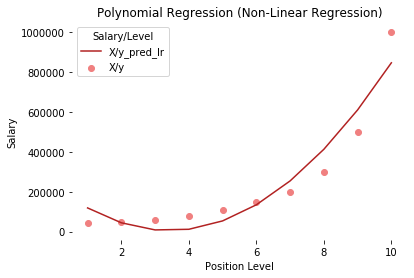

In [51]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Polynomial Regression (Non-Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()